<a href="https://colab.research.google.com/github/sordenesf/IA-generativa/blob/main/Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Generative AI Search Trends in the United States

La información ha sido obtenida desde el sitio web https://makeovermonday.co.uk/ y corresponden a los datos de la Semana 8 del año 2024

Fuente de los datos: https://trends.google.com/trends/explore?date=2022-01-01%202024-02-16&geo=US&q=Midjourney,Stable%20Diffusion,DALL%20E&hl=eng

Lectura de los registros (vienen con una cabecera que tiene 2 espacios):

In [24]:
filename = '/content/drive/MyDrive/Coding Dojo/Week 4/Ejercicio de visualización de datos (práctica)/multiTimeline.csv'
df = pd.read_csv(filename, skiprows=2)

In [25]:
df.head()

,Semana,Midjourney: (Estados Unidos),Stable Diffusion: (Estados Unidos),DALL E: (Estados Unidos)
0,2021-12-26,0,0,0
1,2022-01-02,0,0,0
2,2022-01-09,0,0,0
3,2022-01-16,0,0,0
4,2022-01-23,0,0,0


Información de cada columna:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Semana                              112 non-null    object
 1   Midjourney: (Estados Unidos)        112 non-null    object
 2   Stable Diffusion: (Estados Unidos)  112 non-null    object
 3   DALL E: (Estados Unidos)            112 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB


Se renombran las columnas mediante un diccionario:

---



In [27]:
diccionario = {'Semana':'Fecha',
               'Midjourney: (Estados Unidos)':'Midjourney',
               'Stable Diffusion: (Estados Unidos)': 'Stable Diffusion',
               'DALL E: (Estados Unidos)':'DALL E'
               }
df = df.rename(columns=diccionario)
df.head()

,Fecha,Midjourney,Stable Diffusion,DALL E
0,2021-12-26,0,0,0
1,2022-01-02,0,0,0
2,2022-01-09,0,0,0
3,2022-01-16,0,0,0
4,2022-01-23,0,0,0


Revisando los tipo de datos, obsevamos dos puntos:

1.- La columna Semana es tipo object, pero corresponde a fechas

2.- El resto de las columnas son tipo object, pero corresponden a datos numéricos

En primer lugar, se trabaja con la columna fecha: conversión de tipo object a datetime. Partes de código obtenidos en https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime


In [28]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [29]:
df.head()

,Fecha,Midjourney,Stable Diffusion,DALL E
0,2021-12-26,0,0,0
1,2022-01-02,0,0,0
2,2022-01-09,0,0,0
3,2022-01-16,0,0,0
4,2022-01-23,0,0,0


Ahora, se trabajará con el resto de las columnas. Como se mencionó los datos son numéricos, pero no se pueden convertir directamente a números, ya que hay valores inferiores a 1 que están registrados como <1

A continuación, hacemos un reemplazo:

In [30]:
df.loc[:,['Midjourney','Stable Diffusion','DALL E']] = df.loc[:,['Midjourney','Stable Diffusion','DALL E']].replace('<1',0.5)

In [31]:
df['DALL E'].value_counts()

DALL E
3      20
4      20
2      19
1      15
0      13
5       7
7       4
9       2
11      2
0.5     1
10      1
13      1
12      1
20      1
8       1
46      1
100     1
62      1
6       1
Name: count, dtype: int64

In [32]:
df[['Midjourney','Stable Diffusion','DALL E']] = df[['Midjourney','Stable Diffusion','DALL E']].astype('float64')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             112 non-null    datetime64[ns]
 1   Midjourney        112 non-null    float64       
 2   Stable Diffusion  112 non-null    float64       
 3   DALL E            112 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.6 KB


In [34]:
fecha = df['Fecha']
midjourney = df['Midjourney']
stable_diffusion = df['Stable Diffusion']
dall_e = df['DALL E']

Ahora que tenemos los registros en formatos adecuados, se elige un estilo y se procede con la visualización.

In [35]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

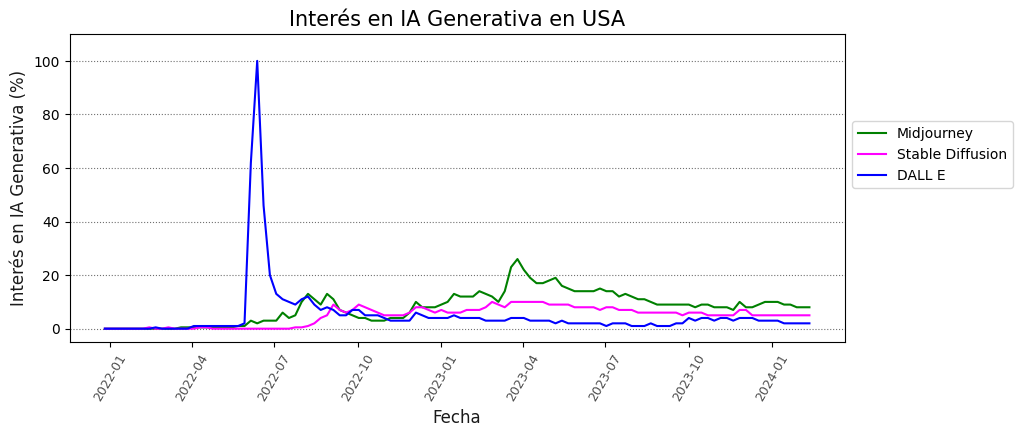

In [40]:
# Formateo del gráfico  (Fuente https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.11-Settings-and-Stylesheets.ipynb#scrollTo=qzy49z4Kb-xK)
plt.figure(figsize=(10,4), facecolor='white')

plt.style.use('tableau-colorblind10')
plt.plot(fecha, midjourney, c='green', label='Midjourney')
plt.plot(fecha, stable_diffusion, c='magenta', label='Stable Diffusion')
plt.plot(fecha, dall_e,  c='blue', label='DALL E')
plt.xticks(rotation=60, c=(0.3,0.3,0.3), fontsize=9)

# Cuadricula
plt.grid(axis='y', c=(0.2,0.2,0.2), alpha = 0.7, linestyle = 'dotted')

# Limites de y
plt.ylim(bottom=-5,top=110)

# Títulos de los ejes
plt.xlabel('Fecha', fontsize=12, c=(0.1,0.1,0.1))
plt.ylabel('Interés en IA Generativa (%)', fontsize=12, c=(0.1,0.1,0.1))

# Títutlo de gráfico
plt.title('Interés en IA Generativa en USA', fontsize=15)

# Leyenda
plt.legend(loc=(1.01, 0.5))